In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Telco_customer_churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# **Data Cleaning Check**

In [6]:
#Checking for null values

df.isna().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [7]:
#Checking for duplicated values

df[df.duplicated()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


In [8]:
#Dropping the unnecessary column
df.drop(columns='CustomerID',inplace=True)

In [9]:
df.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [10]:
#Checking if the dataset is about the same country and state..

print(df['Country'].unique())
print(df['State'].unique())
print(df['Count'].unique())

['United States']
['California']
[1]


In [11]:
#Dropping as they have single values
df.drop(columns=['Country','State','Count'],inplace=True)

In [12]:
df.head()

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [13]:
#Dropping 'Lat Long' feature as latitude and longitude are seperately present

df.drop(columns='Lat Long',inplace=True)

# **Interesting Visuals Ahead!**


--- Numeric Feature Distributions (Histograms) ---


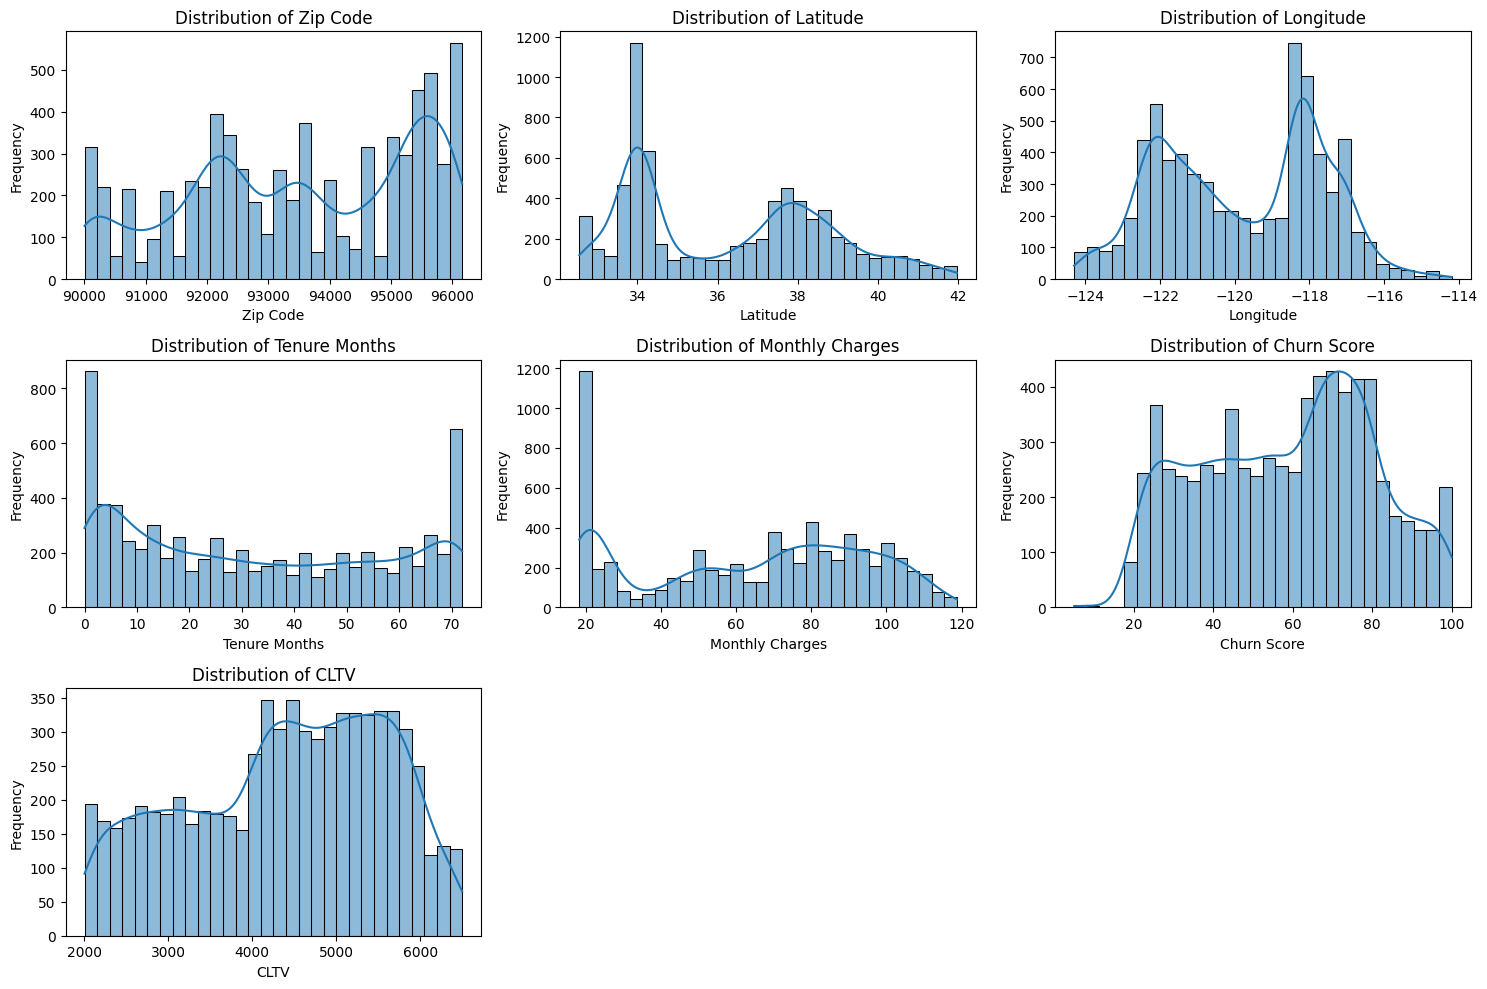

In [14]:


print("\n--- Numeric Feature Distributions (Histograms) ---")
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

cols_to_plot = [col for col in numeric_cols if col not in ['Churn Value', 'Senior Citizen', 'City_Encoded']]

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    if df[col].nunique() > 10: # Only plot truly continuous-like features
        plt.subplot(3, 3, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


--- Categorical Feature Distributions vs. Churn ---


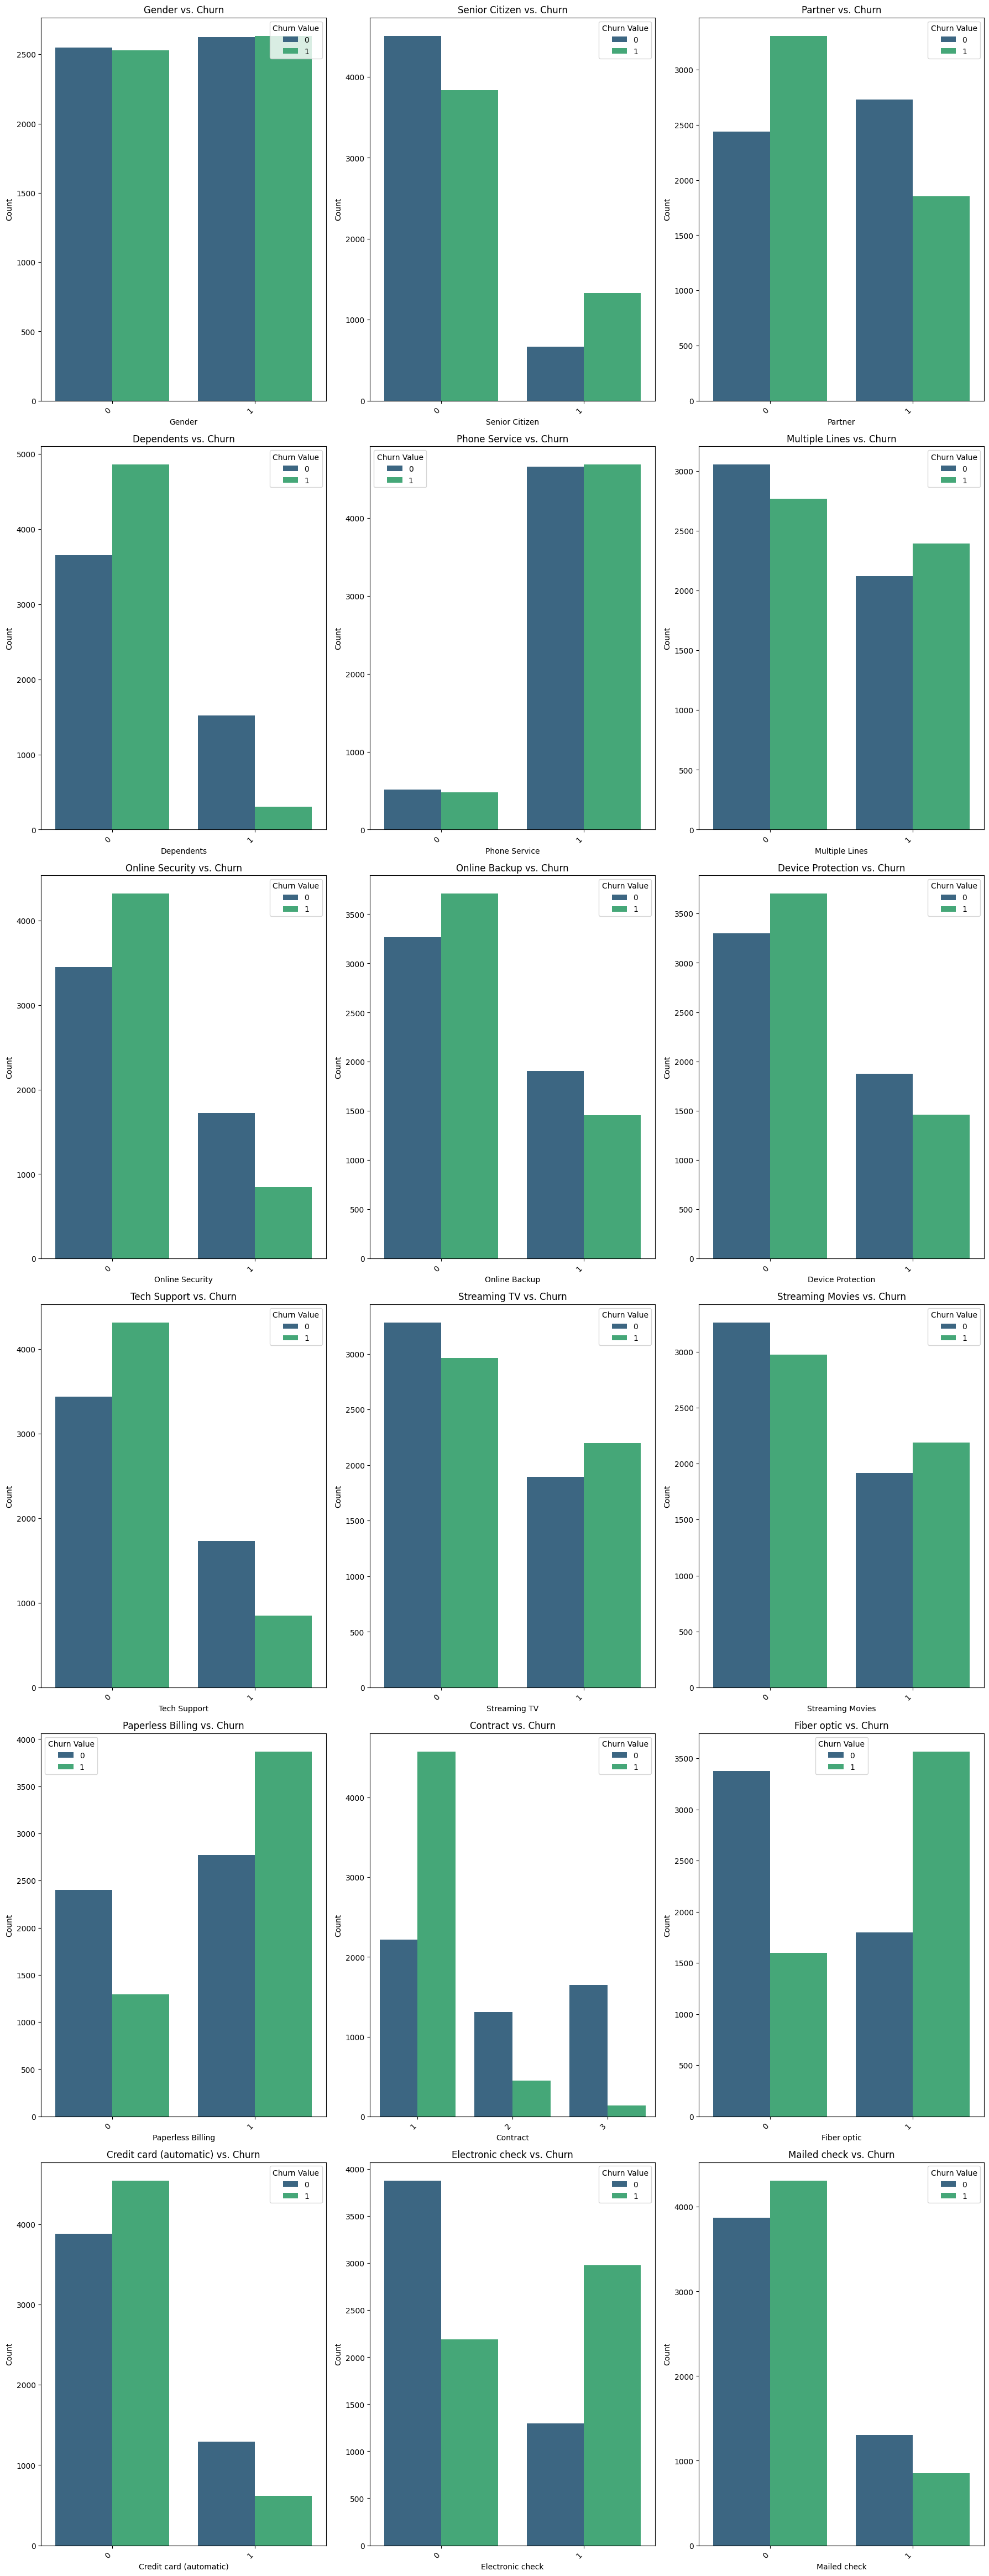

In [50]:

print("\n--- Categorical Feature Distributions vs. Churn ---")

cat_cols_for_viz = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
    'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing',
    'Contract', 'DSL', 'Fiber optic', 'No internet service', # From Internet Service One-Hot
    'Credit card (automatic)', 'Electronic check', 'Mailed check' # From Payment Method One-Hot
]


cat_cols_for_viz = [col for col in cat_cols_for_viz if col in df.columns]

plt.figure(figsize=(18, len(cat_cols_for_viz) * 3))
for i, col in enumerate(cat_cols_for_viz):
    plt.subplot(len(cat_cols_for_viz) // 3 + 1, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn Value', palette='viridis')
    plt.title(f'{col} vs. Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Correlation Heatmap ---


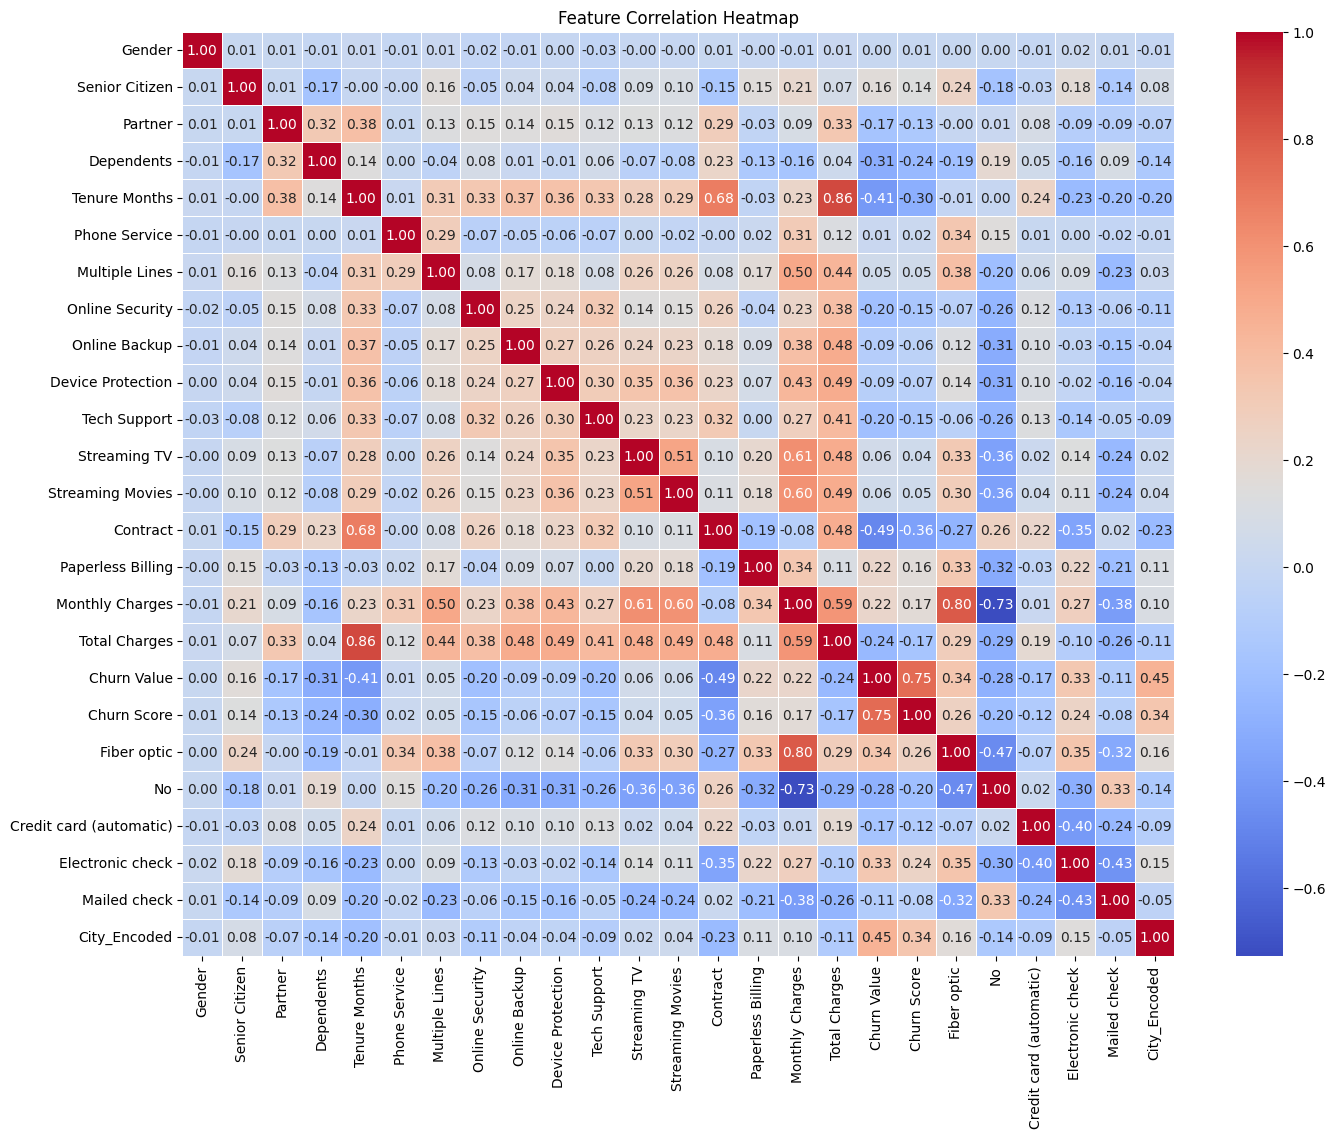

In [51]:


print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(16, 12))
# Calculate correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [15]:
#Lets look at all the categorical features

df.select_dtypes(include='object').head()

,City,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
0,Los Angeles,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,Moved
2,Los Angeles,Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,Moved
3,Los Angeles,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,Moved
4,Los Angeles,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,Competitor had better devices


In [16]:
#Converting Total Charges to numeric feat
#Got error for converting into float as it had an emty ' ' entry
#Filled that with 0.

df['Total Charges'] = df['Total Charges'].replace(' ', np.nan)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'] = df['Total Charges'].fillna(0)

In [17]:
# List of columns to convert from Yes/No/Other to 1/0
binary_cols = [
    'Partner','Senior Citizen', 'Dependents', 'Phone Service', 'Paperless Billing',
    'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies'
]


# 'No phone service' and 'No internet service' will be treated as 'No' (0)
replace_map = {
    'Yes': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0
}


for col in binary_cols:
    df[col] = df[col].replace(replace_map)


df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

/tmp/ipython-input-3016774705.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(replace_map)


In [18]:
#Replacing the nan in 'Churn Reason' to 'Unknown'

df['Churn Reason']=df['Churn Reason'].fillna('Unknown')

In [19]:
#Checking on the other categorical columns that are non-binary


print(df['Internet Service'].unique())
print(df['Contract'].unique())
print(df['Payment Method'].unique())
print(df['City'].unique())
print(df['Churn Reason'].unique())

['DSL' 'Fiber optic' 'No']
['Month-to-month' 'Two year' 'One year']
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' 'Unknown']


In [20]:
#Extracted Domain knowledge on these features via perplexity ai and decided wether to one hot encode (No hierarchial trait effect on the output) or label encodinhg

#one_hot=['Internet Service','Payment Method']
#label_enc=['Contract']
#target_enc=['City']

inter_dummy=pd.get_dummies(df['Internet Service'],drop_first=True,dtype=int)
pay_dummy=pd.get_dummies(df['Payment Method'],drop_first=True,dtype=int)

df=pd.concat([df,inter_dummy,pay_dummy],axis=1)
df.drop(columns=['Internet Service','Payment Method'],inplace=True)


df['Contract']=df['Contract'].map({'Month-to-month':1,'One year':2,'Two year':3})


# Target encode 'City' based on 'Churn Value' as label encoding wouldnt make sense and one hot encoding would inrease sparsity
city_churn_mean = df.groupby('City')['Churn Value'].mean()
df['City_Encoded'] = df['City'].map(city_churn_mean)
df.drop(columns=['City'], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 7043 non-null   int64  
 1   Latitude                 7043 non-null   float64
 2   Longitude                7043 non-null   float64
 3   Gender                   7043 non-null   int64  
 4   Senior Citizen           7043 non-null   int64  
 5   Partner                  7043 non-null   int64  
 6   Dependents               7043 non-null   int64  
 7   Tenure Months            7043 non-null   int64  
 8   Phone Service            7043 non-null   int64  
 9   Multiple Lines           7043 non-null   int64  
 10  Online Security          7043 non-null   int64  
 11  Online Backup            7043 non-null   int64  
 12  Device Protection        7043 non-null   int64  
 13  Tech Support             7043 non-null   int64  
 14  Streaming TV            

In [22]:
df.head()

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Churn Value,Churn Score,CLTV,Churn Reason,Fiber optic,No,Credit card (automatic),Electronic check,Mailed check,City_Encoded
0,90003,33.964131,-118.272783,1,0,0,0,2,1,0,...,1,86,3239,Competitor made better offer,0,0,0,0,1,0.295082
1,90005,34.059281,-118.307420,0,0,0,1,2,1,0,...,1,67,2701,Moved,1,0,0,1,0,0.295082
2,90006,34.048013,-118.293953,0,0,0,1,8,1,1,...,1,86,5372,Moved,1,0,0,1,0,0.295082
3,90010,34.062125,-118.315709,0,0,1,1,28,1,1,...,1,84,5003,Moved,1,0,0,1,0,0.295082
4,90015,34.039224,-118.266293,1,0,0,1,49,1,1,...,1,89,5340,Competitor had better devices,1,0,0,0,0,0.295082


In [23]:
#There are features like Churn Label(redundant as churn value is there) , Churn Score, Churn Reason that are redundant and cause data leakage as these are obtained after the churn has happened.

df.drop(columns=['Churn Label','Churn Reason'],inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 7043 non-null   int64  
 1   Latitude                 7043 non-null   float64
 2   Longitude                7043 non-null   float64
 3   Gender                   7043 non-null   int64  
 4   Senior Citizen           7043 non-null   int64  
 5   Partner                  7043 non-null   int64  
 6   Dependents               7043 non-null   int64  
 7   Tenure Months            7043 non-null   int64  
 8   Phone Service            7043 non-null   int64  
 9   Multiple Lines           7043 non-null   int64  
 10  Online Security          7043 non-null   int64  
 11  Online Backup            7043 non-null   int64  
 12  Device Protection        7043 non-null   int64  
 13  Tech Support             7043 non-null   int64  
 14  Streaming TV            

In [25]:
df.drop(columns=['Zip Code','Latitude','Longitude','CLTV'],inplace=True)

In [26]:
data_distribution=df['Churn Value'].value_counts(normalize=True)*100
print(data_distribution)

Churn Value
0    73.463013
1    26.536987
Name: proportion, dtype: float64


# **WE SEE THAT THE TARGET DISTRIBUTION IS HIGHLY IMBALANCED. UPSAMPLING REQUIRED**

In [27]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df[(df['Churn Value']==0)]
df_minority = df[(df['Churn Value']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 5163, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df = pd.concat([df_minority_upsampled, df_majority])

df['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,5163


In [28]:
x=df.drop(columns='Churn Value')
y=df['Churn Value']

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.utils import resample

train_dist = y_train.value_counts(normalize=True) * 100
test_dist = y_test.value_counts(normalize=True) * 100

print(f"Train Data Distribution:\n{train_dist}\n")
print(f"Test Data Distribution:\n{test_dist}\n")


Train Data Distribution:
Churn Value
0    50.532135
1    49.467865
Name: proportion, dtype: float64

Test Data Distribution:
Churn Value
1    51.06383
0    48.93617
Name: proportion, dtype: float64



In [31]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
y_pred=xgb.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9664732430689877
[[1432   86]
 [  18 1566]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1518
           1       0.95      0.99      0.97      1584

    accuracy                           0.97      3102
   macro avg       0.97      0.97      0.97      3102
weighted avg       0.97      0.97      0.97      3102

0.9659914361001318


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred=rf.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9690522243713733
[[1442   76]
 [  20 1564]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1518
           1       0.95      0.99      0.97      1584

    accuracy                           0.97      3102
   macro avg       0.97      0.97      0.97      3102
weighted avg       0.97      0.97      0.97      3102

0.9686539306104525


#***But here is a catch!***

-The model is using 'Churn Score' which is an inhouse model to predict if a customer will churn or not. Which causes data leakage

In [37]:
#Dropping 'Churn Score'

X_train.drop(columns='Churn Score',inplace=True)
X_test.drop(columns='Churn Score',inplace=True)




In [38]:
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9174725983236621
[[1330  188]
 [  68 1516]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1518
           1       0.89      0.96      0.92      1584

    accuracy                           0.92      3102
   macro avg       0.92      0.92      0.92      3102
weighted avg       0.92      0.92      0.92      3102

0.9166117698726395


In [39]:
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.8952288845905867
[[1284  234]
 [  91 1493]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1518
           1       0.86      0.94      0.90      1584

    accuracy                           0.90      3102
   macro avg       0.90      0.89      0.89      3102
weighted avg       0.90      0.90      0.89      3102

0.8942001537110233


In [40]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


In [41]:
from catboost import CatBoostClassifier

cat=CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.023984
0:	learn: 0.6747247	total: 49.9ms	remaining: 49.8s
1:	learn: 0.6592729	total: 52.8ms	remaining: 26.3s
2:	learn: 0.6431885	total: 55.6ms	remaining: 18.5s
3:	learn: 0.6268546	total: 58.8ms	remaining: 14.6s
4:	learn: 0.6122007	total: 61.8ms	remaining: 12.3s
5:	learn: 0.5967070	total: 65ms	remaining: 10.8s
6:	learn: 0.5834510	total: 68.3ms	remaining: 9.69s
7:	learn: 0.5717932	total: 71.4ms	remaining: 8.85s
8:	learn: 0.5603414	total: 74.5ms	remaining: 8.21s
9:	learn: 0.5506297	total: 77.8ms	remaining: 7.71s
10:	learn: 0.5416356	total: 81ms	remaining: 7.28s
11:	learn: 0.5314359	total: 83.9ms	remaining: 6.9s
12:	learn: 0.5229962	total: 86.8ms	remaining: 6.59s
13:	learn: 0.5154055	total: 89.6ms	remaining: 6.31s
14:	learn: 0.5089475	total: 92.4ms	remaining: 6.07s
15:	learn: 0.5024197	total: 95.2ms	remaining: 5.86s
16:	learn: 0.4952152	total: 98.1ms	remaining: 5.67s
17:	learn: 0.4901603	total: 101ms	remaining: 5.51s
18:	learn: 0.4854762	total: 104ms	remaining: 5.36s

In [42]:
y_pred=cat.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))


0.8845905867182463
[[1269  249]
 [ 109 1475]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1518
           1       0.86      0.93      0.89      1584

    accuracy                           0.88      3102
   macro avg       0.89      0.88      0.88      3102
weighted avg       0.89      0.88      0.88      3102

0.8835776240667546


# **Now we hyperparameter tune our best performing Random Forest model**

# After applying RandomizedSearchCV , here are the best parameters- {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False} . Didnt include that code part as it would take long when the ipynb is run again.

In [43]:
rf_hyper=RandomForestClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False)

In [44]:
rf_hyper.fit(X_train,y_train)


RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=1000)

In [45]:
y_pred=rf_hyper.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9226305609284333
[[1352  166]
 [  74 1510]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1518
           1       0.90      0.95      0.93      1584

    accuracy                           0.92      3102
   macro avg       0.92      0.92      0.92      3102
weighted avg       0.92      0.92      0.92      3102

0.9219642072902943


# After applying GridSearchCV, on top of the randomised search cv model , here are the best parameters- {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1100} . Didnt include that code part as it would take long when the ipynb is run again.

[41]
0s


#

In [46]:
rf_grid=RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=1100)
rf_grid.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=1100)

In [47]:
y_pred=rf_grid.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9223081882656351
[[1351  167]
 [  74 1510]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1518
           1       0.90      0.95      0.93      1584

    accuracy                           0.92      3102
   macro avg       0.92      0.92      0.92      3102
weighted avg       0.92      0.92      0.92      3102

0.9216348265261309


# **ROC AUC CURVE**


--- ROC Curve for Best Random Forest Model ---


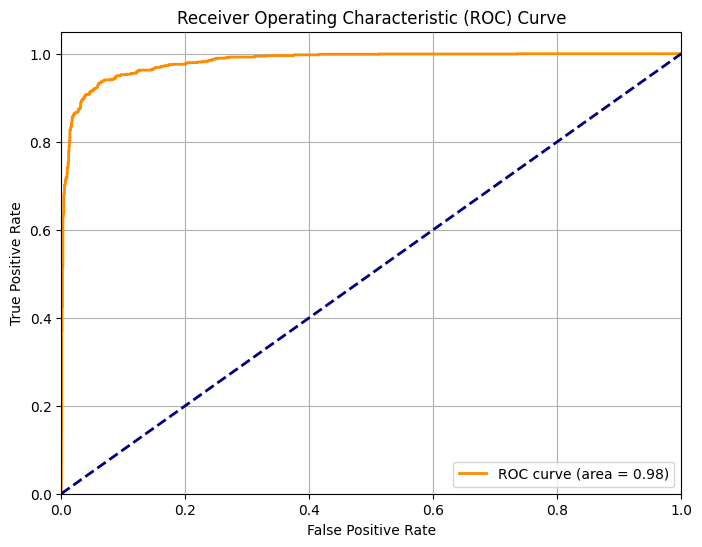

In [52]:


from sklearn.metrics import roc_curve, auc

print("\n--- ROC Curve for Best Random Forest Model ---")


y_pred_proba = rf_grid.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [48]:
#Checking how the final dataset looks like -PS - Will help us in writing endpoints

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10337 entries, 1126 to 7042
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   10337 non-null  int64  
 1   Senior Citizen           10337 non-null  int64  
 2   Partner                  10337 non-null  int64  
 3   Dependents               10337 non-null  int64  
 4   Tenure Months            10337 non-null  int64  
 5   Phone Service            10337 non-null  int64  
 6   Multiple Lines           10337 non-null  int64  
 7   Online Security          10337 non-null  int64  
 8   Online Backup            10337 non-null  int64  
 9   Device Protection        10337 non-null  int64  
 10  Tech Support             10337 non-null  int64  
 11  Streaming TV             10337 non-null  int64  
 12  Streaming Movies         10337 non-null  int64  
 13  Contract                 10337 non-null  int64  
 14  Paperless Billing        

In [49]:
#Downloading the best performing model in .pkl format to deploy and use it

import pickle
from google.colab import files

with open('churn_model_grid.pkl', 'wb') as file:
    pickle.dump(rf_grid, file)

#files.download('churn_model_grid.pkl')